In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"srayhit","key":"63c9172ef76dd363600122cebac3f9e9"}'}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge              COVID-19 Open Research Dataset Challenge (CORD-19)    1GB  2020-04-11 13:32:24          51933  
roche-data-science-coalition/uncover                           UNCOVER COVID-19 Challenge                          123MB  2020-04-08 22:04:30           3629  
praveengovi/coronahack-chest-xraydataset                       CoronaHack -Chest X-Ray-Dataset                       1GB  2020-03-20 01:26:40            423  
katerpillar/meteonet                                           MeteoNet North-West France                           11GB  2020-04-16 08:35:45             15  
andrewmvd/covid19-ct-scans                    

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d cdawn1/messy-vs-clean-room

100% 67.0M/67.1M [00:02<00:00, 19.0MB/s]
100% 67.1M/67.1M [00:02<00:00, 29.1MB/s]


In [20]:
!pwd
!ls

/content
kaggle.json  messy-vs-clean-room  messy-vs-clean-room.zip  sample_data


In [0]:
local_zip = '/content/messy-vs-clean-room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/messy-vs-clean-room')
zip_ref.close()

In [0]:
import os
import zipfile

# Directory with our training clean pictures
train_clean_dir = os.path.join('/content/messy-vs-clean-room/images/train/clean')

# Directory with our training messy pictures
train_messy_dir = os.path.join('/content/messy-vs-clean-room/images/train/messy')

# Directory with our validation clean pictures
validation_clean_dir = os.path.join('/content/messy-vs-clean-room/images/val/clean')

# Directory with our validation messy pictures
validation_messy_dir = os.path.join('/content/messy-vs-clean-room/images/val/messy')

In [0]:
#Obtain the list of all files and directories in the specified directory
train_clean_names = os.listdir(train_clean_dir)
train_messy_names = os.listdir(train_messy_dir)

validation_clean_hames = os.listdir(validation_clean_dir)
validation_messy_names = os.listdir(validation_messy_dir)

In [63]:
#Import model

import tensorflow as tf
from keras import regularizers

Using TensorFlow backend.


In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # # The fifth convolution
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('clean') and 1 for the other ('messy')
    tf.keras.layers.Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01))
])

In [79]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 18496)            

In [0]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [81]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/messy-vs-clean-room/images/train/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/messy-vs-clean-room/images/val/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [82]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 3s 418ms/step - loss: 4.3811 - accuracy: 0.5000 - val_loss: 2.4571 - val_accuracy: 0.7000
Epoch 2/15
8/8 [==============================] - 3s 400ms/step - loss: 1.9270 - accuracy: 0.6068 - val_loss: 1.5102 - val_accuracy: 0.8000
Epoch 3/15
8/8 [==============================] - 3s 403ms/step - loss: 1.3587 - accuracy: 0.7695 - val_loss: 1.1725 - val_accuracy: 0.8000
Epoch 4/15
8/8 [==============================] - 3s 401ms/step - loss: 1.1217 - accuracy: 0.7786 - val_loss: 0.9271 - val_accuracy: 0.8000
Epoch 5/15
8/8 [==============================] - 3s 400ms/step - loss: 0.9423 - accuracy: 0.7969 - val_loss: 0.8512 - val_accuracy: 0.8000
Epoch 6/15
8/8 [==============================] - 3s 398ms/step - loss: 0.7596 - accuracy: 0.8411 - val_loss: 0.6646 - val_accuracy: 0.8500
Epoch 7/15
8/8 [==============================] - 3s 424ms/step - loss: 0.6442 - accuracy: 0.8815 - val_loss: 0.5733 - val_accuracy: 0.9000
Epoch 8/15
8/8 [====

In [83]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<built-in method keys of dict object at 0x7f727aa651b0>


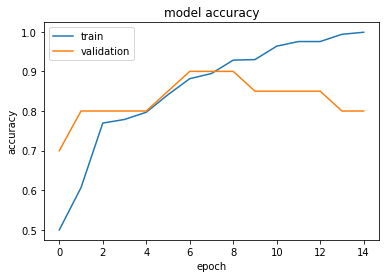

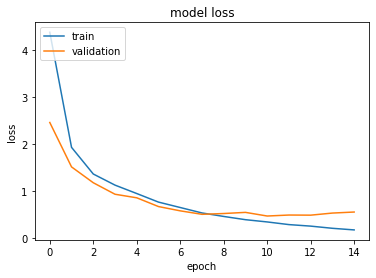

In [84]:
#Plot accuracy and loss of the training and validation

import matplotlib.pyplot as plt

print(history.history.keys)
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [92]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a clean room")
  else:
    print(fn + " is a messy room")

Saving 8.png to 8.png
[1.]
8.png is a clean room


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


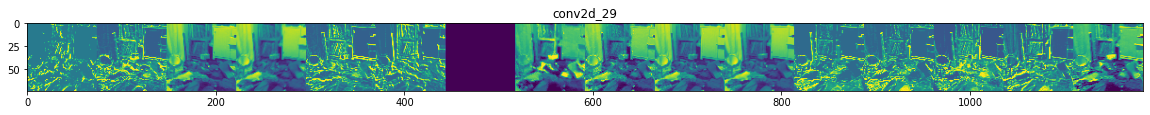

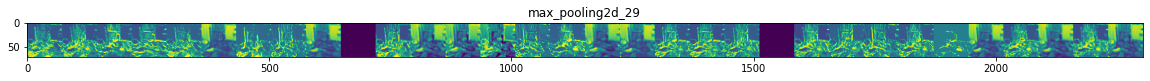

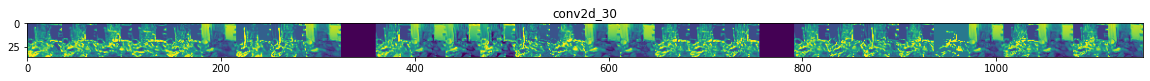

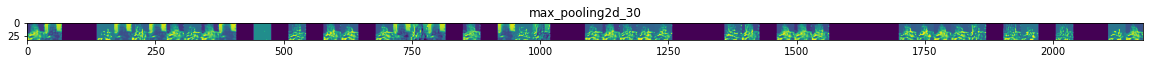

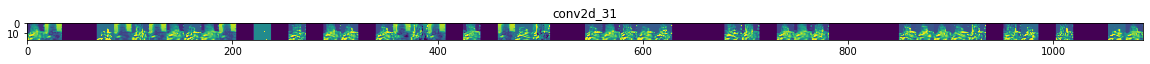

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
clean_img_files = [os.path.join(train_clean_dir, f) for f in train_clean_names]
messy_img_files = [os.path.join(train_messy_dir, f) for f in train_messy_names]
img_path = random.choice(clean_img_files + messy_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')